In [0]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm

In [0]:
class DirectedGraph:

    def __init__(self, number_of_nodes):
        self.__number_of_nodes = number_of_nodes
        #self.number_of_nodes = number_of_nodes
        self.adjacency_matrix = np.zeros((number_of_nodes, number_of_nodes))

    def add_edge(self, origin_node, destination_node):
        self.adjacency_matrix[origin_node, destination_node] = 1
    
    def edges_from(self, origin_node):
        ''' This method should return a list of all the nodes u such that the edge (origin_node,u) is
        part of the graph.'''
        get_row = self.adjacency_matrix[origin_node]
        get_edge_nodes = np.where(get_row == 1)[0]
        return list(get_edge_nodes)
    
    def check_edge(self, origin_node, destination_node):
        ''' This method should return true is there is an edge between origin_node and destination_node
        and destination_node, and false otherwise'''
        return(self.adjacency_matrix[origin_node, destination_node] == 1)
        #if (self.adjacency_matrix[origin_node, destination_node] == 1):
          #return True
        #return False

    def number_of_nodes(self):
        ''' This method should return the number of nodes in the graph'''
        return(self.__number_of_nodes)
        #return(self.number_of_nodes)

    # Additional Methods
    def out_degree(self, origin_node):
        return(len(self.edges_from(origin_node = origin_node)))
    
    def get_nodes(self):
        return(list(range(self.number_of_nodes())))

    def edges_to(self, destination_node):
        return (list(np.where(self.adjacency_matrix[:, destination_node] == 1)[0]))

In [0]:
testGraph = DirectedGraph(5)
assert testGraph.number_of_nodes() == 5
assert testGraph.check_edge(0, 1) == False
testGraph.add_edge(0, 1)
assert testGraph.check_edge(0, 1) == True
assert testGraph.edges_from(0) == [1]

In [0]:
def scaled_page_rank(graph, num_iter, eps = 1/7.0):
    ''' This method, given a directed graph, should run the epsilon-scaled page-rank
    algorithm for num-iter iterations and return a mapping (dictionary) between a node and its weight. 
    In the case of 0 iterations, all nodes should have weight 1/number_of_nodes'''  
    previous = np.full(graph.number_of_nodes(),(1/graph.number_of_nodes()))
    ranks = np.zeros(graph.number_of_nodes())

    for i in range(num_iter):
      for j in range(graph.number_of_nodes()):
        rank = 0
        for node in graph.edges_to(j):
          
          rank += previous[node] / graph.out_degree(node)
        ranks[j] = (eps/graph.number_of_nodes()) + (1-eps) * rank

      previous = np.copy(ranks)

    return previous

In [0]:
def show_graph(graph):
  viridis = cm.get_cmap('RdYlBu')
  ranks = scaled_page_rank(graph,10)
  sorted_rank = np.argsort(ranks)
  network = nx.DiGraph()
  network.add_nodes_from(np.arange(graph.number_of_nodes()))
  
  for node in range(graph.number_of_nodes()):
    for to in graph.edges_from(node):
      network.add_edge(node,to)

  colors = np.full((graph.number_of_nodes()),(.5))
  for rank in sorted_rank:
    colors[rank] = 1-ranks[rank]

  print('page ranks: ',ranks)
  print("Lowest to highest ranks: ",sorted_rank)
  nx.draw(network, node_size=300, width=.5,with_labels=True, node_color=colors, cmap=viridis, vmin=(1-ranks).min(), vmax=(1-ranks).max())
  plt.show()

page ranks:  [0.138693   0.09515414 0.12014183 0.64601103]
Lowest to highest ranks:  [1 2 0 3]


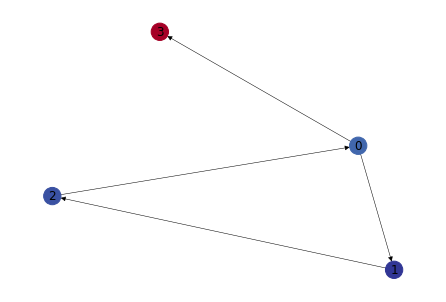

In [0]:
def graph_15_1_left():
    ''' This method, should construct and return a DirectedGraph encoding the left example in fig 15.1
    Use the following indexes: A:0, B:1, C:2, Z:3 '''
    g = DirectedGraph(4)
    g.add_edge(0,1)
    g.add_edge(1,2)
    g.add_edge(2,0)
    g.add_edge(0,3)
    g.add_edge(3,3)
    return g

show_graph(graph_15_1_left())

page ranks:  [0.0947099  0.0556314  0.07716155 0.38624857 0.38624857]
Lowest to highest ranks:  [1 2 0 3 4]


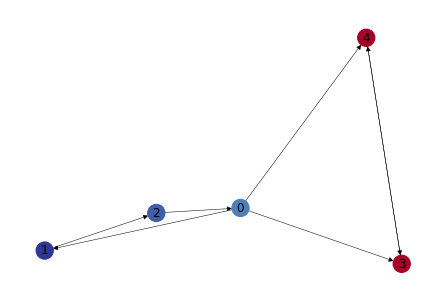

In [0]:
def graph_15_1_right():
    ''' This method, should construct and return a DirectedGraph encoding the right example in fig 15.1
    Use the following indexes: A:0, B:1, C:2, Z1:3, Z2:4'''
    g = DirectedGraph(5)
    g.add_edge(0, 1)
    g.add_edge(1, 2)
    g.add_edge(2, 0)
    g.add_edge(0, 3)
    g.add_edge(0, 4)
    g.add_edge(3, 4)
    g.add_edge(4, 3)
    return g

show_graph(graph_15_1_right(),2)

page ranks:  [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
Lowest to highest ranks:  [0 1 2 3 4 5]


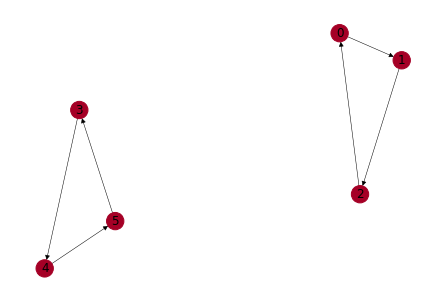

In [0]:
def graph_15_2():
    ''' This method, should construct and return a DirectedGraph encoding example 15.2
        Use the following indexes: A:0, B:1, C:2, A':3, B':4, C':5'''
    g = DirectedGraph(6)
    g.add_edge(0, 1)
    
    g.add_edge(1, 2)
    g.add_edge(2, 0)
    g.add_edge(3, 4)
    g.add_edge(4, 5)
    g.add_edge(5, 3)
    return g
show_graph(graph_15_2(),1)

page ranks:  [0.00952381 0.01768707 0.02468416 0.03068166 0.03582238 0.0402287
 0.04400555 0.04724286 0.05001769 0.09321244 0.00952381 0.00952381
 0.00952381 0.00952381 0.00952381]
Lowest to highest ranks:  [ 0 10 11 12 13 14  1  2  3  4  5  6  7  8  9]


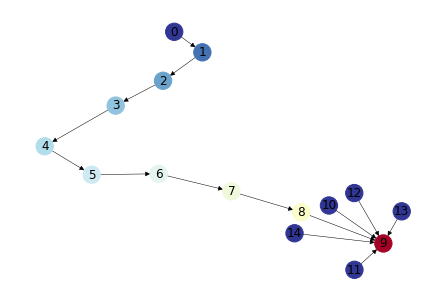

In [0]:
#test 1
#testing
g = DirectedGraph(15)
g.add_edge(0,1)
g.add_edge(1,2)
g.add_edge(2,3)
g.add_edge(3,4)
g.add_edge(4,5)
g.add_edge(5,6)
g.add_edge(6,7)
g.add_edge(7,8)
g.add_edge(8,9)
g.add_edge(10,9)
g.add_edge(11,9)
g.add_edge(12,9)
g.add_edge(13,9)
g.add_edge(14,9)


show_graph(g,3)

page ranks:  [0.01428571 0.01581633 0.01581633 0.01581633 0.01581633 0.01581633
 0.01581633 0.01581633 0.01581633 0.02784257]
Lowest to highest ranks:  [0 1 2 3 4 5 6 7 8 9]


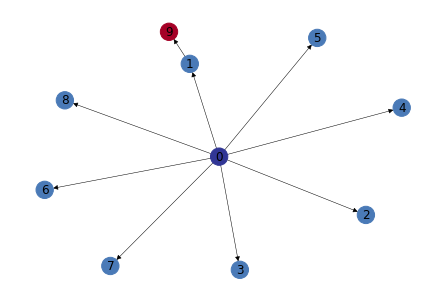

In [0]:
#test 1
#testing
g = DirectedGraph(10)
g.add_edge(0,1)
g.add_edge(0,2)
g.add_edge(0,3)
g.add_edge(0,4)
g.add_edge(0,5)
g.add_edge(0,6)
g.add_edge(0,7)
g.add_edge(0,8)
g.add_edge(1,9)



show_graph(g,1)

In [0]:
def facebook_graph(filename = "facebook_combined.txt"):
    ''' This method should return a DIRECTED version of the facebook graph as an instance of the DirectedGraph class.
    In particular, if u and v are friends, there should be an edge between u and v and an edge between v and u.'''
    with open(filename, mode="r") as f:
        content = f.readlines()
    content = [x.strip().split(' ') for x in content]

    g = DirectedGraph(4039)
    for edge in content:
        g.add_edge(origin_node=int(edge[0]), destination_node=int(edge[1]))
        g.add_edge(origin_node=int(edge[1]), destination_node=int(edge[0]))

    return g

In [0]:
def question8b():
    # Load Facebook graph
    filepath = "facebook_combined.txt"
    FB_g = facebook_graph(filename = filepath)

    # Run PR for 20 iterations
    pr = scaled_page_rank(graph = FB_g, num_iter=20)

    return pr

In [0]:
#TEST
facebook_ranks = question8b()

In [0]:
fb_ranks_sorted = np.argsort(facebook_ranks)
facebook_directed = facebook_graph()


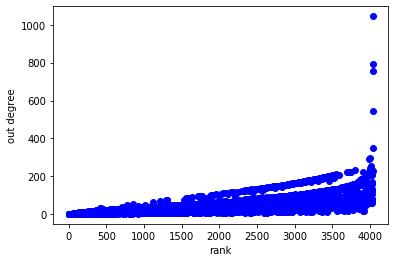

In [0]:
for rank in fb_ranks_sorted:
  plt.plot(rank,facebook_directed.out_degree(fb_ranks_sorted[rank]),'bo')
plt.ylabel('out degree')
plt.xlabel('rank')
plt.show()

In [0]:
facebook_network = nx.Graph()
facebook_network.add_nodes_from(np.arange(facebook_directed.number_of_nodes()))
for node in range(facebook_directed.number_of_nodes()):
  for to in facebook_directed.edges_from(node):
    facebook_network.add_edge(node,to)

colors = np.full(facebook_directed.number_of_nodes(),'b')
for node in fb_ranks_sorted[-100:]:
    colors[node]='r'
for node in fb_ranks_sorted[:500]:
    colors[node]='g'

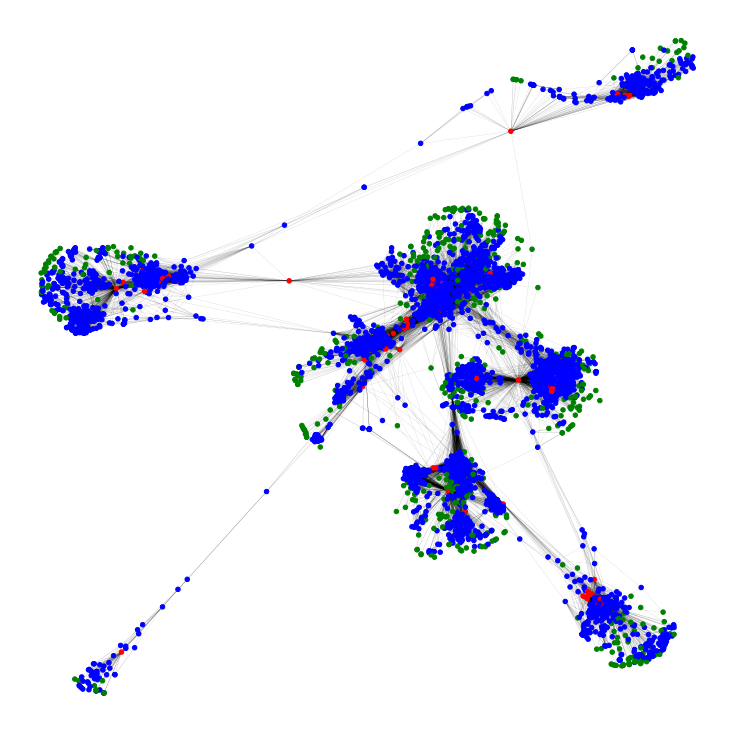

In [0]:
plt.figure(1,figsize=(10,10)) 
nx.draw(facebook_network, node_size=20, width=.05, with_labels=False, node_color=colors)
plt.show()